# Defect_Classification_CNN

* Written by: Angelo D. Bonzanini and Ketong Shao
* Date: June-July 2021

<< Code Desctription >>

## Imports

In [356]:
# General
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image as im

# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
import tensorflow_addons as tfa
# ImageAI
from imageai.Detection import ObjectDetection

## Load SEM and EDX data provided by Lam Research

In [357]:
execution_path = os.getcwd()
targetDir = os.path.join(execution_path , "CNN_Data_LAM")
trainData = np.load(targetDir+'/train_data_6rot_3layer.npy', allow_pickle=True)
testData = np.load(targetDir+'/train_data_0rot_3layer.npy', allow_pickle=True)

### Plot the data to get intuition on the structure

Overall training data dimensions: (23880, 4)
-----------------------------------------------
xTrain[i, 0] shape: (140, 140)
xTrain[i, 1] shape: (1, 4096)
xTrain[i, 2] shape: (4096,)
xTrain[i, 3] shape: (8,)
-----------------------------------------------


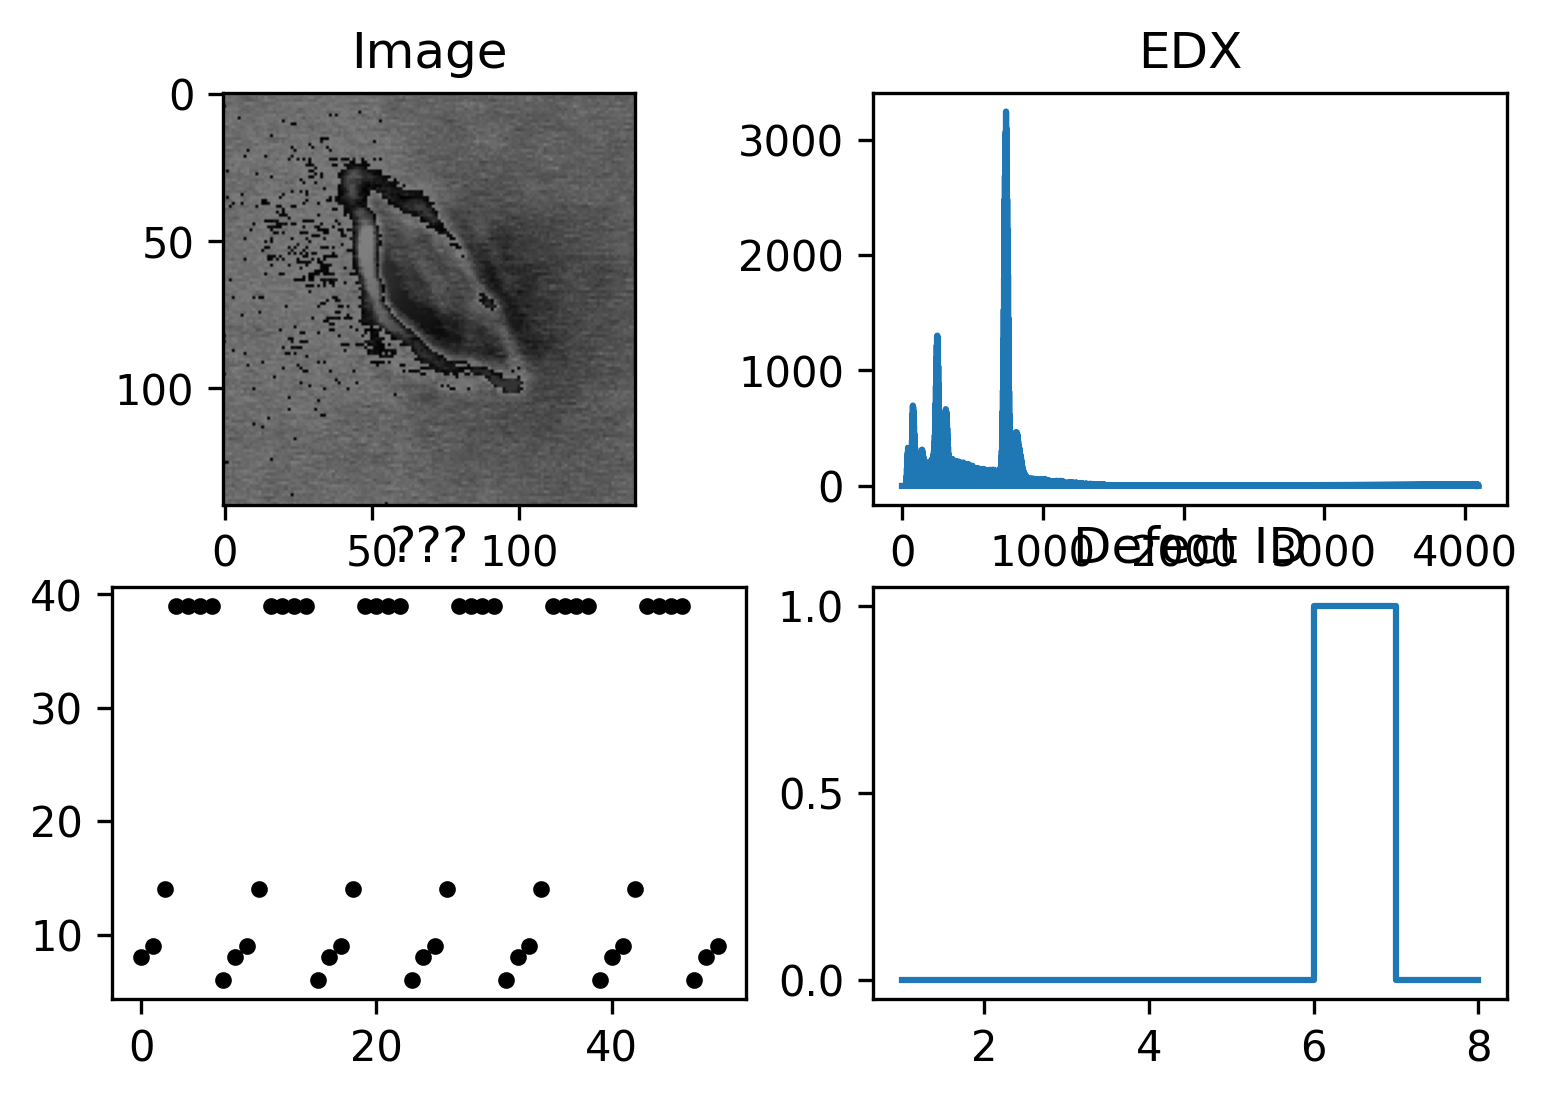

In [358]:
# Print dimensions of each array within the array
print('Overall training data dimensions:', trainData.shape)
print('-----------------------------------------------')
for j in range(0, 4):
    print('xTrain[i, %d] shape:' %j, trainData[0,j].shape)
print('-----------------------------------------------')

# Plot
plt.figure(dpi=300)
plt.subplot(221)
plt.imshow(trainData[0, 0], cmap='gray', vmin=-1, vmax=1)
plt.title('Image')
plt.subplot(222)
plt.plot(trainData[0, 1][0, :])
plt.title('EDX')
plt.subplot(223)
plt.plot(trainData[0, 2][0:50], 'k.')
plt.title('???')
plt.subplot(224)
plt.step(list(range(1, len(trainData[0,3])+1)), trainData[0, 3])
plt.title('Defect ID')
plt.show()

## Define a class containing all the parameters

In [359]:
class Parameters:
    def __init__(self):
        self.Ntrain = trainData.shape[0]
        self.imgSize = [trainData[0,0].shape[0],trainData[0,0].shape[1]]
        self.dropoutRate = 0.5
        

p = Parameters();

### Extract Training Images and Labels

In [360]:
trainImages = (trainData[0:-100,0]+1)*255/2
trainLabels = (trainData[0:-100,3]+1)*255/2

valImages = (trainData[-100:,0]+1)*255/2
valLabels = (trainData[-100:,3]+1)*255/2

testImages = testData[:,0]
testLabels = testData[:,3]

In [363]:
xTrain = []
for i in range(0, len(trainImages)):
    print('iteration %d of %d' %(i, len(trainImages)))
    imgRGB  = im.fromarray(trainImages[i]).convert('RGB')
    xTrain += [np.array(imgRGB.getdata()).reshape(p.imgSize[0], p.imgSize[1], 3)]

iteration 0 of 23780
iteration 1 of 23780
iteration 2 of 23780
iteration 3 of 23780
iteration 4 of 23780
iteration 5 of 23780
iteration 6 of 23780
iteration 7 of 23780
iteration 8 of 23780
iteration 9 of 23780
iteration 10 of 23780
iteration 11 of 23780
iteration 12 of 23780
iteration 13 of 23780
iteration 14 of 23780
iteration 15 of 23780
iteration 16 of 23780
iteration 17 of 23780
iteration 18 of 23780
iteration 19 of 23780
iteration 20 of 23780
iteration 21 of 23780
iteration 22 of 23780
iteration 23 of 23780
iteration 24 of 23780
iteration 25 of 23780
iteration 26 of 23780
iteration 27 of 23780
iteration 28 of 23780
iteration 29 of 23780
iteration 30 of 23780
iteration 31 of 23780
iteration 32 of 23780
iteration 33 of 23780
iteration 34 of 23780
iteration 35 of 23780
iteration 36 of 23780
iteration 37 of 23780
iteration 38 of 23780
iteration 39 of 23780
iteration 40 of 23780
iteration 41 of 23780
iteration 42 of 23780
iteration 43 of 23780
iteration 44 of 23780
iteration 45 of 2378

iteration 365 of 23780
iteration 366 of 23780
iteration 367 of 23780
iteration 368 of 23780
iteration 369 of 23780
iteration 370 of 23780
iteration 371 of 23780
iteration 372 of 23780
iteration 373 of 23780
iteration 374 of 23780
iteration 375 of 23780
iteration 376 of 23780
iteration 377 of 23780
iteration 378 of 23780
iteration 379 of 23780
iteration 380 of 23780
iteration 381 of 23780
iteration 382 of 23780
iteration 383 of 23780
iteration 384 of 23780
iteration 385 of 23780
iteration 386 of 23780
iteration 387 of 23780
iteration 388 of 23780
iteration 389 of 23780
iteration 390 of 23780
iteration 391 of 23780
iteration 392 of 23780
iteration 393 of 23780
iteration 394 of 23780
iteration 395 of 23780
iteration 396 of 23780
iteration 397 of 23780
iteration 398 of 23780
iteration 399 of 23780
iteration 400 of 23780
iteration 401 of 23780
iteration 402 of 23780
iteration 403 of 23780
iteration 404 of 23780
iteration 405 of 23780
iteration 406 of 23780
iteration 407 of 23780
iteration 4

iteration 722 of 23780
iteration 723 of 23780
iteration 724 of 23780
iteration 725 of 23780
iteration 726 of 23780
iteration 727 of 23780
iteration 728 of 23780
iteration 729 of 23780
iteration 730 of 23780
iteration 731 of 23780
iteration 732 of 23780
iteration 733 of 23780
iteration 734 of 23780
iteration 735 of 23780
iteration 736 of 23780
iteration 737 of 23780
iteration 738 of 23780
iteration 739 of 23780
iteration 740 of 23780
iteration 741 of 23780
iteration 742 of 23780
iteration 743 of 23780
iteration 744 of 23780
iteration 745 of 23780
iteration 746 of 23780
iteration 747 of 23780
iteration 748 of 23780
iteration 749 of 23780
iteration 750 of 23780
iteration 751 of 23780
iteration 752 of 23780
iteration 753 of 23780
iteration 754 of 23780
iteration 755 of 23780
iteration 756 of 23780
iteration 757 of 23780
iteration 758 of 23780
iteration 759 of 23780
iteration 760 of 23780
iteration 761 of 23780
iteration 762 of 23780
iteration 763 of 23780
iteration 764 of 23780
iteration 7

iteration 1075 of 23780
iteration 1076 of 23780
iteration 1077 of 23780
iteration 1078 of 23780
iteration 1079 of 23780
iteration 1080 of 23780
iteration 1081 of 23780
iteration 1082 of 23780
iteration 1083 of 23780
iteration 1084 of 23780
iteration 1085 of 23780
iteration 1086 of 23780
iteration 1087 of 23780
iteration 1088 of 23780
iteration 1089 of 23780
iteration 1090 of 23780
iteration 1091 of 23780
iteration 1092 of 23780
iteration 1093 of 23780
iteration 1094 of 23780
iteration 1095 of 23780
iteration 1096 of 23780
iteration 1097 of 23780
iteration 1098 of 23780
iteration 1099 of 23780
iteration 1100 of 23780
iteration 1101 of 23780
iteration 1102 of 23780
iteration 1103 of 23780
iteration 1104 of 23780
iteration 1105 of 23780
iteration 1106 of 23780
iteration 1107 of 23780
iteration 1108 of 23780
iteration 1109 of 23780
iteration 1110 of 23780
iteration 1111 of 23780
iteration 1112 of 23780
iteration 1113 of 23780
iteration 1114 of 23780
iteration 1115 of 23780
iteration 1116 o

iteration 1417 of 23780
iteration 1418 of 23780
iteration 1419 of 23780
iteration 1420 of 23780
iteration 1421 of 23780
iteration 1422 of 23780
iteration 1423 of 23780
iteration 1424 of 23780
iteration 1425 of 23780
iteration 1426 of 23780
iteration 1427 of 23780
iteration 1428 of 23780
iteration 1429 of 23780
iteration 1430 of 23780
iteration 1431 of 23780
iteration 1432 of 23780
iteration 1433 of 23780
iteration 1434 of 23780
iteration 1435 of 23780
iteration 1436 of 23780
iteration 1437 of 23780
iteration 1438 of 23780
iteration 1439 of 23780
iteration 1440 of 23780
iteration 1441 of 23780
iteration 1442 of 23780
iteration 1443 of 23780
iteration 1444 of 23780
iteration 1445 of 23780
iteration 1446 of 23780
iteration 1447 of 23780
iteration 1448 of 23780
iteration 1449 of 23780
iteration 1450 of 23780
iteration 1451 of 23780
iteration 1452 of 23780
iteration 1453 of 23780
iteration 1454 of 23780
iteration 1455 of 23780
iteration 1456 of 23780
iteration 1457 of 23780
iteration 1458 o

iteration 1763 of 23780
iteration 1764 of 23780
iteration 1765 of 23780
iteration 1766 of 23780
iteration 1767 of 23780
iteration 1768 of 23780
iteration 1769 of 23780
iteration 1770 of 23780
iteration 1771 of 23780
iteration 1772 of 23780
iteration 1773 of 23780
iteration 1774 of 23780
iteration 1775 of 23780
iteration 1776 of 23780
iteration 1777 of 23780
iteration 1778 of 23780
iteration 1779 of 23780
iteration 1780 of 23780
iteration 1781 of 23780
iteration 1782 of 23780
iteration 1783 of 23780
iteration 1784 of 23780
iteration 1785 of 23780
iteration 1786 of 23780
iteration 1787 of 23780
iteration 1788 of 23780
iteration 1789 of 23780
iteration 1790 of 23780
iteration 1791 of 23780
iteration 1792 of 23780
iteration 1793 of 23780
iteration 1794 of 23780
iteration 1795 of 23780
iteration 1796 of 23780
iteration 1797 of 23780
iteration 1798 of 23780
iteration 1799 of 23780
iteration 1800 of 23780
iteration 1801 of 23780
iteration 1802 of 23780
iteration 1803 of 23780
iteration 1804 o

iteration 2110 of 23780
iteration 2111 of 23780
iteration 2112 of 23780
iteration 2113 of 23780
iteration 2114 of 23780
iteration 2115 of 23780
iteration 2116 of 23780
iteration 2117 of 23780
iteration 2118 of 23780
iteration 2119 of 23780
iteration 2120 of 23780
iteration 2121 of 23780
iteration 2122 of 23780
iteration 2123 of 23780
iteration 2124 of 23780
iteration 2125 of 23780
iteration 2126 of 23780
iteration 2127 of 23780
iteration 2128 of 23780
iteration 2129 of 23780
iteration 2130 of 23780
iteration 2131 of 23780
iteration 2132 of 23780
iteration 2133 of 23780
iteration 2134 of 23780
iteration 2135 of 23780
iteration 2136 of 23780
iteration 2137 of 23780
iteration 2138 of 23780
iteration 2139 of 23780
iteration 2140 of 23780
iteration 2141 of 23780
iteration 2142 of 23780
iteration 2143 of 23780
iteration 2144 of 23780
iteration 2145 of 23780
iteration 2146 of 23780
iteration 2147 of 23780
iteration 2148 of 23780
iteration 2149 of 23780
iteration 2150 of 23780
iteration 2151 o

iteration 2458 of 23780
iteration 2459 of 23780
iteration 2460 of 23780
iteration 2461 of 23780
iteration 2462 of 23780
iteration 2463 of 23780
iteration 2464 of 23780
iteration 2465 of 23780
iteration 2466 of 23780
iteration 2467 of 23780
iteration 2468 of 23780
iteration 2469 of 23780
iteration 2470 of 23780
iteration 2471 of 23780
iteration 2472 of 23780
iteration 2473 of 23780
iteration 2474 of 23780
iteration 2475 of 23780
iteration 2476 of 23780
iteration 2477 of 23780
iteration 2478 of 23780
iteration 2479 of 23780
iteration 2480 of 23780
iteration 2481 of 23780
iteration 2482 of 23780
iteration 2483 of 23780
iteration 2484 of 23780
iteration 2485 of 23780
iteration 2486 of 23780
iteration 2487 of 23780
iteration 2488 of 23780
iteration 2489 of 23780
iteration 2490 of 23780
iteration 2491 of 23780
iteration 2492 of 23780
iteration 2493 of 23780
iteration 2494 of 23780
iteration 2495 of 23780
iteration 2496 of 23780
iteration 2497 of 23780
iteration 2498 of 23780
iteration 2499 o

iteration 2803 of 23780
iteration 2804 of 23780
iteration 2805 of 23780
iteration 2806 of 23780
iteration 2807 of 23780
iteration 2808 of 23780
iteration 2809 of 23780
iteration 2810 of 23780
iteration 2811 of 23780
iteration 2812 of 23780
iteration 2813 of 23780
iteration 2814 of 23780
iteration 2815 of 23780
iteration 2816 of 23780
iteration 2817 of 23780
iteration 2818 of 23780
iteration 2819 of 23780
iteration 2820 of 23780
iteration 2821 of 23780
iteration 2822 of 23780
iteration 2823 of 23780
iteration 2824 of 23780
iteration 2825 of 23780
iteration 2826 of 23780
iteration 2827 of 23780
iteration 2828 of 23780
iteration 2829 of 23780
iteration 2830 of 23780
iteration 2831 of 23780
iteration 2832 of 23780
iteration 2833 of 23780
iteration 2834 of 23780
iteration 2835 of 23780
iteration 2836 of 23780
iteration 2837 of 23780
iteration 2838 of 23780
iteration 2839 of 23780
iteration 2840 of 23780
iteration 2841 of 23780
iteration 2842 of 23780
iteration 2843 of 23780
iteration 2844 o

iteration 3146 of 23780
iteration 3147 of 23780
iteration 3148 of 23780
iteration 3149 of 23780
iteration 3150 of 23780
iteration 3151 of 23780
iteration 3152 of 23780
iteration 3153 of 23780
iteration 3154 of 23780
iteration 3155 of 23780
iteration 3156 of 23780
iteration 3157 of 23780
iteration 3158 of 23780
iteration 3159 of 23780
iteration 3160 of 23780
iteration 3161 of 23780
iteration 3162 of 23780
iteration 3163 of 23780
iteration 3164 of 23780
iteration 3165 of 23780
iteration 3166 of 23780
iteration 3167 of 23780
iteration 3168 of 23780
iteration 3169 of 23780
iteration 3170 of 23780
iteration 3171 of 23780
iteration 3172 of 23780
iteration 3173 of 23780
iteration 3174 of 23780
iteration 3175 of 23780
iteration 3176 of 23780
iteration 3177 of 23780
iteration 3178 of 23780
iteration 3179 of 23780
iteration 3180 of 23780
iteration 3181 of 23780
iteration 3182 of 23780
iteration 3183 of 23780
iteration 3184 of 23780
iteration 3185 of 23780
iteration 3186 of 23780
iteration 3187 o

iteration 3490 of 23780
iteration 3491 of 23780
iteration 3492 of 23780
iteration 3493 of 23780
iteration 3494 of 23780
iteration 3495 of 23780
iteration 3496 of 23780
iteration 3497 of 23780
iteration 3498 of 23780
iteration 3499 of 23780
iteration 3500 of 23780
iteration 3501 of 23780
iteration 3502 of 23780
iteration 3503 of 23780
iteration 3504 of 23780
iteration 3505 of 23780
iteration 3506 of 23780
iteration 3507 of 23780
iteration 3508 of 23780
iteration 3509 of 23780
iteration 3510 of 23780
iteration 3511 of 23780
iteration 3512 of 23780
iteration 3513 of 23780
iteration 3514 of 23780
iteration 3515 of 23780
iteration 3516 of 23780
iteration 3517 of 23780
iteration 3518 of 23780
iteration 3519 of 23780
iteration 3520 of 23780
iteration 3521 of 23780
iteration 3522 of 23780
iteration 3523 of 23780
iteration 3524 of 23780
iteration 3525 of 23780
iteration 3526 of 23780
iteration 3527 of 23780
iteration 3528 of 23780
iteration 3529 of 23780
iteration 3530 of 23780
iteration 3531 o

iteration 3834 of 23780
iteration 3835 of 23780
iteration 3836 of 23780
iteration 3837 of 23780
iteration 3838 of 23780
iteration 3839 of 23780
iteration 3840 of 23780
iteration 3841 of 23780
iteration 3842 of 23780
iteration 3843 of 23780
iteration 3844 of 23780
iteration 3845 of 23780
iteration 3846 of 23780
iteration 3847 of 23780
iteration 3848 of 23780
iteration 3849 of 23780
iteration 3850 of 23780
iteration 3851 of 23780
iteration 3852 of 23780
iteration 3853 of 23780
iteration 3854 of 23780
iteration 3855 of 23780
iteration 3856 of 23780
iteration 3857 of 23780
iteration 3858 of 23780
iteration 3859 of 23780
iteration 3860 of 23780
iteration 3861 of 23780
iteration 3862 of 23780
iteration 3863 of 23780
iteration 3864 of 23780
iteration 3865 of 23780
iteration 3866 of 23780
iteration 3867 of 23780
iteration 3868 of 23780
iteration 3869 of 23780
iteration 3870 of 23780
iteration 3871 of 23780
iteration 3872 of 23780
iteration 3873 of 23780
iteration 3874 of 23780
iteration 3875 o

iteration 4181 of 23780
iteration 4182 of 23780
iteration 4183 of 23780
iteration 4184 of 23780
iteration 4185 of 23780
iteration 4186 of 23780
iteration 4187 of 23780
iteration 4188 of 23780
iteration 4189 of 23780
iteration 4190 of 23780
iteration 4191 of 23780
iteration 4192 of 23780
iteration 4193 of 23780
iteration 4194 of 23780
iteration 4195 of 23780
iteration 4196 of 23780
iteration 4197 of 23780
iteration 4198 of 23780
iteration 4199 of 23780
iteration 4200 of 23780
iteration 4201 of 23780
iteration 4202 of 23780
iteration 4203 of 23780
iteration 4204 of 23780
iteration 4205 of 23780
iteration 4206 of 23780
iteration 4207 of 23780
iteration 4208 of 23780
iteration 4209 of 23780
iteration 4210 of 23780
iteration 4211 of 23780
iteration 4212 of 23780
iteration 4213 of 23780
iteration 4214 of 23780
iteration 4215 of 23780
iteration 4216 of 23780
iteration 4217 of 23780
iteration 4218 of 23780
iteration 4219 of 23780
iteration 4220 of 23780
iteration 4221 of 23780
iteration 4222 o

iteration 4524 of 23780
iteration 4525 of 23780
iteration 4526 of 23780
iteration 4527 of 23780
iteration 4528 of 23780
iteration 4529 of 23780
iteration 4530 of 23780
iteration 4531 of 23780
iteration 4532 of 23780
iteration 4533 of 23780
iteration 4534 of 23780
iteration 4535 of 23780
iteration 4536 of 23780
iteration 4537 of 23780
iteration 4538 of 23780
iteration 4539 of 23780
iteration 4540 of 23780
iteration 4541 of 23780
iteration 4542 of 23780
iteration 4543 of 23780
iteration 4544 of 23780
iteration 4545 of 23780
iteration 4546 of 23780
iteration 4547 of 23780
iteration 4548 of 23780
iteration 4549 of 23780
iteration 4550 of 23780
iteration 4551 of 23780
iteration 4552 of 23780
iteration 4553 of 23780
iteration 4554 of 23780
iteration 4555 of 23780
iteration 4556 of 23780
iteration 4557 of 23780
iteration 4558 of 23780
iteration 4559 of 23780
iteration 4560 of 23780
iteration 4561 of 23780
iteration 4562 of 23780
iteration 4563 of 23780
iteration 4564 of 23780
iteration 4565 o

iteration 4868 of 23780
iteration 4869 of 23780
iteration 4870 of 23780
iteration 4871 of 23780
iteration 4872 of 23780
iteration 4873 of 23780
iteration 4874 of 23780
iteration 4875 of 23780
iteration 4876 of 23780
iteration 4877 of 23780
iteration 4878 of 23780
iteration 4879 of 23780
iteration 4880 of 23780
iteration 4881 of 23780
iteration 4882 of 23780
iteration 4883 of 23780
iteration 4884 of 23780
iteration 4885 of 23780
iteration 4886 of 23780
iteration 4887 of 23780
iteration 4888 of 23780
iteration 4889 of 23780
iteration 4890 of 23780
iteration 4891 of 23780
iteration 4892 of 23780
iteration 4893 of 23780
iteration 4894 of 23780
iteration 4895 of 23780
iteration 4896 of 23780
iteration 4897 of 23780
iteration 4898 of 23780
iteration 4899 of 23780
iteration 4900 of 23780
iteration 4901 of 23780
iteration 4902 of 23780
iteration 4903 of 23780
iteration 4904 of 23780
iteration 4905 of 23780
iteration 4906 of 23780
iteration 4907 of 23780
iteration 4908 of 23780
iteration 4909 o

iteration 5210 of 23780
iteration 5211 of 23780
iteration 5212 of 23780
iteration 5213 of 23780
iteration 5214 of 23780
iteration 5215 of 23780
iteration 5216 of 23780
iteration 5217 of 23780
iteration 5218 of 23780
iteration 5219 of 23780
iteration 5220 of 23780
iteration 5221 of 23780
iteration 5222 of 23780
iteration 5223 of 23780
iteration 5224 of 23780
iteration 5225 of 23780
iteration 5226 of 23780
iteration 5227 of 23780
iteration 5228 of 23780
iteration 5229 of 23780
iteration 5230 of 23780
iteration 5231 of 23780
iteration 5232 of 23780
iteration 5233 of 23780
iteration 5234 of 23780
iteration 5235 of 23780
iteration 5236 of 23780
iteration 5237 of 23780
iteration 5238 of 23780
iteration 5239 of 23780
iteration 5240 of 23780
iteration 5241 of 23780
iteration 5242 of 23780
iteration 5243 of 23780
iteration 5244 of 23780
iteration 5245 of 23780
iteration 5246 of 23780
iteration 5247 of 23780
iteration 5248 of 23780
iteration 5249 of 23780
iteration 5250 of 23780
iteration 5251 o

iteration 5553 of 23780
iteration 5554 of 23780
iteration 5555 of 23780
iteration 5556 of 23780
iteration 5557 of 23780
iteration 5558 of 23780
iteration 5559 of 23780
iteration 5560 of 23780
iteration 5561 of 23780
iteration 5562 of 23780
iteration 5563 of 23780
iteration 5564 of 23780
iteration 5565 of 23780
iteration 5566 of 23780
iteration 5567 of 23780
iteration 5568 of 23780
iteration 5569 of 23780
iteration 5570 of 23780
iteration 5571 of 23780
iteration 5572 of 23780
iteration 5573 of 23780
iteration 5574 of 23780
iteration 5575 of 23780
iteration 5576 of 23780
iteration 5577 of 23780
iteration 5578 of 23780
iteration 5579 of 23780
iteration 5580 of 23780
iteration 5581 of 23780
iteration 5582 of 23780
iteration 5583 of 23780
iteration 5584 of 23780
iteration 5585 of 23780
iteration 5586 of 23780
iteration 5587 of 23780
iteration 5588 of 23780
iteration 5589 of 23780
iteration 5590 of 23780
iteration 5591 of 23780
iteration 5592 of 23780
iteration 5593 of 23780
iteration 5594 o

iteration 5897 of 23780
iteration 5898 of 23780
iteration 5899 of 23780
iteration 5900 of 23780
iteration 5901 of 23780
iteration 5902 of 23780
iteration 5903 of 23780
iteration 5904 of 23780
iteration 5905 of 23780
iteration 5906 of 23780
iteration 5907 of 23780
iteration 5908 of 23780
iteration 5909 of 23780
iteration 5910 of 23780
iteration 5911 of 23780
iteration 5912 of 23780
iteration 5913 of 23780
iteration 5914 of 23780
iteration 5915 of 23780
iteration 5916 of 23780
iteration 5917 of 23780
iteration 5918 of 23780
iteration 5919 of 23780
iteration 5920 of 23780
iteration 5921 of 23780
iteration 5922 of 23780
iteration 5923 of 23780
iteration 5924 of 23780
iteration 5925 of 23780
iteration 5926 of 23780
iteration 5927 of 23780
iteration 5928 of 23780
iteration 5929 of 23780
iteration 5930 of 23780
iteration 5931 of 23780
iteration 5932 of 23780
iteration 5933 of 23780
iteration 5934 of 23780
iteration 5935 of 23780
iteration 5936 of 23780
iteration 5937 of 23780
iteration 5938 o

iteration 6243 of 23780
iteration 6244 of 23780
iteration 6245 of 23780
iteration 6246 of 23780
iteration 6247 of 23780
iteration 6248 of 23780
iteration 6249 of 23780
iteration 6250 of 23780
iteration 6251 of 23780
iteration 6252 of 23780
iteration 6253 of 23780
iteration 6254 of 23780
iteration 6255 of 23780
iteration 6256 of 23780
iteration 6257 of 23780
iteration 6258 of 23780
iteration 6259 of 23780
iteration 6260 of 23780
iteration 6261 of 23780
iteration 6262 of 23780
iteration 6263 of 23780
iteration 6264 of 23780
iteration 6265 of 23780
iteration 6266 of 23780
iteration 6267 of 23780
iteration 6268 of 23780
iteration 6269 of 23780
iteration 6270 of 23780
iteration 6271 of 23780
iteration 6272 of 23780
iteration 6273 of 23780
iteration 6274 of 23780
iteration 6275 of 23780
iteration 6276 of 23780
iteration 6277 of 23780
iteration 6278 of 23780
iteration 6279 of 23780
iteration 6280 of 23780
iteration 6281 of 23780
iteration 6282 of 23780
iteration 6283 of 23780
iteration 6284 o

iteration 6589 of 23780
iteration 6590 of 23780
iteration 6591 of 23780
iteration 6592 of 23780
iteration 6593 of 23780
iteration 6594 of 23780
iteration 6595 of 23780
iteration 6596 of 23780
iteration 6597 of 23780
iteration 6598 of 23780
iteration 6599 of 23780
iteration 6600 of 23780
iteration 6601 of 23780
iteration 6602 of 23780
iteration 6603 of 23780
iteration 6604 of 23780
iteration 6605 of 23780
iteration 6606 of 23780
iteration 6607 of 23780
iteration 6608 of 23780
iteration 6609 of 23780
iteration 6610 of 23780
iteration 6611 of 23780
iteration 6612 of 23780
iteration 6613 of 23780
iteration 6614 of 23780
iteration 6615 of 23780
iteration 6616 of 23780
iteration 6617 of 23780
iteration 6618 of 23780
iteration 6619 of 23780
iteration 6620 of 23780
iteration 6621 of 23780
iteration 6622 of 23780
iteration 6623 of 23780
iteration 6624 of 23780
iteration 6625 of 23780
iteration 6626 of 23780
iteration 6627 of 23780
iteration 6628 of 23780
iteration 6629 of 23780
iteration 6630 o

iteration 6937 of 23780
iteration 6938 of 23780
iteration 6939 of 23780
iteration 6940 of 23780
iteration 6941 of 23780
iteration 6942 of 23780
iteration 6943 of 23780
iteration 6944 of 23780
iteration 6945 of 23780
iteration 6946 of 23780
iteration 6947 of 23780
iteration 6948 of 23780
iteration 6949 of 23780
iteration 6950 of 23780
iteration 6951 of 23780
iteration 6952 of 23780
iteration 6953 of 23780
iteration 6954 of 23780
iteration 6955 of 23780
iteration 6956 of 23780
iteration 6957 of 23780
iteration 6958 of 23780
iteration 6959 of 23780
iteration 6960 of 23780
iteration 6961 of 23780
iteration 6962 of 23780
iteration 6963 of 23780
iteration 6964 of 23780
iteration 6965 of 23780
iteration 6966 of 23780
iteration 6967 of 23780
iteration 6968 of 23780
iteration 6969 of 23780
iteration 6970 of 23780
iteration 6971 of 23780
iteration 6972 of 23780
iteration 6973 of 23780
iteration 6974 of 23780
iteration 6975 of 23780
iteration 6976 of 23780
iteration 6977 of 23780
iteration 6978 o

iteration 7284 of 23780
iteration 7285 of 23780
iteration 7286 of 23780
iteration 7287 of 23780
iteration 7288 of 23780
iteration 7289 of 23780
iteration 7290 of 23780
iteration 7291 of 23780
iteration 7292 of 23780
iteration 7293 of 23780
iteration 7294 of 23780
iteration 7295 of 23780
iteration 7296 of 23780
iteration 7297 of 23780
iteration 7298 of 23780
iteration 7299 of 23780
iteration 7300 of 23780
iteration 7301 of 23780
iteration 7302 of 23780
iteration 7303 of 23780
iteration 7304 of 23780
iteration 7305 of 23780
iteration 7306 of 23780
iteration 7307 of 23780
iteration 7308 of 23780
iteration 7309 of 23780
iteration 7310 of 23780
iteration 7311 of 23780
iteration 7312 of 23780
iteration 7313 of 23780
iteration 7314 of 23780
iteration 7315 of 23780
iteration 7316 of 23780
iteration 7317 of 23780
iteration 7318 of 23780
iteration 7319 of 23780
iteration 7320 of 23780
iteration 7321 of 23780
iteration 7322 of 23780
iteration 7323 of 23780
iteration 7324 of 23780
iteration 7325 o

iteration 7630 of 23780
iteration 7631 of 23780
iteration 7632 of 23780
iteration 7633 of 23780
iteration 7634 of 23780
iteration 7635 of 23780
iteration 7636 of 23780
iteration 7637 of 23780
iteration 7638 of 23780
iteration 7639 of 23780
iteration 7640 of 23780
iteration 7641 of 23780
iteration 7642 of 23780
iteration 7643 of 23780
iteration 7644 of 23780
iteration 7645 of 23780
iteration 7646 of 23780
iteration 7647 of 23780
iteration 7648 of 23780
iteration 7649 of 23780
iteration 7650 of 23780
iteration 7651 of 23780
iteration 7652 of 23780
iteration 7653 of 23780
iteration 7654 of 23780
iteration 7655 of 23780
iteration 7656 of 23780
iteration 7657 of 23780
iteration 7658 of 23780
iteration 7659 of 23780
iteration 7660 of 23780
iteration 7661 of 23780
iteration 7662 of 23780
iteration 7663 of 23780
iteration 7664 of 23780
iteration 7665 of 23780
iteration 7666 of 23780
iteration 7667 of 23780
iteration 7668 of 23780
iteration 7669 of 23780
iteration 7670 of 23780
iteration 7671 o

iteration 7978 of 23780
iteration 7979 of 23780
iteration 7980 of 23780
iteration 7981 of 23780
iteration 7982 of 23780
iteration 7983 of 23780
iteration 7984 of 23780
iteration 7985 of 23780
iteration 7986 of 23780
iteration 7987 of 23780
iteration 7988 of 23780
iteration 7989 of 23780
iteration 7990 of 23780
iteration 7991 of 23780
iteration 7992 of 23780
iteration 7993 of 23780
iteration 7994 of 23780
iteration 7995 of 23780
iteration 7996 of 23780
iteration 7997 of 23780
iteration 7998 of 23780
iteration 7999 of 23780
iteration 8000 of 23780
iteration 8001 of 23780
iteration 8002 of 23780
iteration 8003 of 23780
iteration 8004 of 23780
iteration 8005 of 23780
iteration 8006 of 23780
iteration 8007 of 23780
iteration 8008 of 23780
iteration 8009 of 23780
iteration 8010 of 23780
iteration 8011 of 23780
iteration 8012 of 23780
iteration 8013 of 23780
iteration 8014 of 23780
iteration 8015 of 23780
iteration 8016 of 23780
iteration 8017 of 23780
iteration 8018 of 23780
iteration 8019 o

iteration 8322 of 23780
iteration 8323 of 23780
iteration 8324 of 23780
iteration 8325 of 23780
iteration 8326 of 23780
iteration 8327 of 23780
iteration 8328 of 23780
iteration 8329 of 23780
iteration 8330 of 23780
iteration 8331 of 23780
iteration 8332 of 23780
iteration 8333 of 23780
iteration 8334 of 23780
iteration 8335 of 23780
iteration 8336 of 23780
iteration 8337 of 23780
iteration 8338 of 23780
iteration 8339 of 23780
iteration 8340 of 23780
iteration 8341 of 23780
iteration 8342 of 23780
iteration 8343 of 23780
iteration 8344 of 23780
iteration 8345 of 23780
iteration 8346 of 23780
iteration 8347 of 23780
iteration 8348 of 23780
iteration 8349 of 23780
iteration 8350 of 23780
iteration 8351 of 23780
iteration 8352 of 23780
iteration 8353 of 23780
iteration 8354 of 23780
iteration 8355 of 23780
iteration 8356 of 23780
iteration 8357 of 23780
iteration 8358 of 23780
iteration 8359 of 23780
iteration 8360 of 23780
iteration 8361 of 23780
iteration 8362 of 23780
iteration 8363 o

iteration 8668 of 23780
iteration 8669 of 23780
iteration 8670 of 23780
iteration 8671 of 23780
iteration 8672 of 23780
iteration 8673 of 23780
iteration 8674 of 23780
iteration 8675 of 23780
iteration 8676 of 23780
iteration 8677 of 23780
iteration 8678 of 23780
iteration 8679 of 23780
iteration 8680 of 23780
iteration 8681 of 23780
iteration 8682 of 23780
iteration 8683 of 23780
iteration 8684 of 23780
iteration 8685 of 23780
iteration 8686 of 23780
iteration 8687 of 23780
iteration 8688 of 23780
iteration 8689 of 23780
iteration 8690 of 23780
iteration 8691 of 23780
iteration 8692 of 23780
iteration 8693 of 23780
iteration 8694 of 23780
iteration 8695 of 23780
iteration 8696 of 23780
iteration 8697 of 23780
iteration 8698 of 23780
iteration 8699 of 23780
iteration 8700 of 23780
iteration 8701 of 23780
iteration 8702 of 23780
iteration 8703 of 23780
iteration 8704 of 23780
iteration 8705 of 23780
iteration 8706 of 23780
iteration 8707 of 23780
iteration 8708 of 23780
iteration 8709 o

iteration 9011 of 23780
iteration 9012 of 23780
iteration 9013 of 23780
iteration 9014 of 23780
iteration 9015 of 23780
iteration 9016 of 23780
iteration 9017 of 23780
iteration 9018 of 23780
iteration 9019 of 23780
iteration 9020 of 23780
iteration 9021 of 23780
iteration 9022 of 23780
iteration 9023 of 23780
iteration 9024 of 23780
iteration 9025 of 23780
iteration 9026 of 23780
iteration 9027 of 23780
iteration 9028 of 23780
iteration 9029 of 23780
iteration 9030 of 23780
iteration 9031 of 23780
iteration 9032 of 23780
iteration 9033 of 23780
iteration 9034 of 23780
iteration 9035 of 23780
iteration 9036 of 23780
iteration 9037 of 23780
iteration 9038 of 23780
iteration 9039 of 23780
iteration 9040 of 23780
iteration 9041 of 23780
iteration 9042 of 23780
iteration 9043 of 23780
iteration 9044 of 23780
iteration 9045 of 23780
iteration 9046 of 23780
iteration 9047 of 23780
iteration 9048 of 23780
iteration 9049 of 23780
iteration 9050 of 23780
iteration 9051 of 23780
iteration 9052 o

iteration 9354 of 23780
iteration 9355 of 23780
iteration 9356 of 23780
iteration 9357 of 23780
iteration 9358 of 23780
iteration 9359 of 23780
iteration 9360 of 23780
iteration 9361 of 23780
iteration 9362 of 23780
iteration 9363 of 23780
iteration 9364 of 23780
iteration 9365 of 23780
iteration 9366 of 23780
iteration 9367 of 23780
iteration 9368 of 23780
iteration 9369 of 23780
iteration 9370 of 23780
iteration 9371 of 23780
iteration 9372 of 23780
iteration 9373 of 23780
iteration 9374 of 23780
iteration 9375 of 23780
iteration 9376 of 23780
iteration 9377 of 23780
iteration 9378 of 23780
iteration 9379 of 23780
iteration 9380 of 23780
iteration 9381 of 23780
iteration 9382 of 23780
iteration 9383 of 23780
iteration 9384 of 23780
iteration 9385 of 23780
iteration 9386 of 23780
iteration 9387 of 23780
iteration 9388 of 23780
iteration 9389 of 23780
iteration 9390 of 23780
iteration 9391 of 23780
iteration 9392 of 23780
iteration 9393 of 23780
iteration 9394 of 23780
iteration 9395 o

iteration 9699 of 23780
iteration 9700 of 23780
iteration 9701 of 23780
iteration 9702 of 23780
iteration 9703 of 23780
iteration 9704 of 23780
iteration 9705 of 23780
iteration 9706 of 23780
iteration 9707 of 23780
iteration 9708 of 23780
iteration 9709 of 23780
iteration 9710 of 23780
iteration 9711 of 23780
iteration 9712 of 23780
iteration 9713 of 23780
iteration 9714 of 23780
iteration 9715 of 23780
iteration 9716 of 23780
iteration 9717 of 23780
iteration 9718 of 23780
iteration 9719 of 23780
iteration 9720 of 23780
iteration 9721 of 23780
iteration 9722 of 23780
iteration 9723 of 23780
iteration 9724 of 23780
iteration 9725 of 23780
iteration 9726 of 23780
iteration 9727 of 23780
iteration 9728 of 23780
iteration 9729 of 23780
iteration 9730 of 23780
iteration 9731 of 23780
iteration 9732 of 23780
iteration 9733 of 23780
iteration 9734 of 23780
iteration 9735 of 23780
iteration 9736 of 23780
iteration 9737 of 23780
iteration 9738 of 23780
iteration 9739 of 23780
iteration 9740 o

iteration 10044 of 23780
iteration 10045 of 23780
iteration 10046 of 23780
iteration 10047 of 23780
iteration 10048 of 23780
iteration 10049 of 23780
iteration 10050 of 23780
iteration 10051 of 23780
iteration 10052 of 23780
iteration 10053 of 23780
iteration 10054 of 23780
iteration 10055 of 23780
iteration 10056 of 23780
iteration 10057 of 23780
iteration 10058 of 23780
iteration 10059 of 23780
iteration 10060 of 23780
iteration 10061 of 23780
iteration 10062 of 23780
iteration 10063 of 23780
iteration 10064 of 23780
iteration 10065 of 23780
iteration 10066 of 23780
iteration 10067 of 23780
iteration 10068 of 23780
iteration 10069 of 23780
iteration 10070 of 23780
iteration 10071 of 23780
iteration 10072 of 23780
iteration 10073 of 23780
iteration 10074 of 23780
iteration 10075 of 23780
iteration 10076 of 23780
iteration 10077 of 23780
iteration 10078 of 23780
iteration 10079 of 23780
iteration 10080 of 23780
iteration 10081 of 23780
iteration 10082 of 23780
iteration 10083 of 23780


iteration 10373 of 23780
iteration 10374 of 23780
iteration 10375 of 23780
iteration 10376 of 23780
iteration 10377 of 23780
iteration 10378 of 23780
iteration 10379 of 23780
iteration 10380 of 23780
iteration 10381 of 23780
iteration 10382 of 23780
iteration 10383 of 23780
iteration 10384 of 23780
iteration 10385 of 23780
iteration 10386 of 23780
iteration 10387 of 23780
iteration 10388 of 23780
iteration 10389 of 23780
iteration 10390 of 23780
iteration 10391 of 23780
iteration 10392 of 23780
iteration 10393 of 23780
iteration 10394 of 23780
iteration 10395 of 23780
iteration 10396 of 23780
iteration 10397 of 23780
iteration 10398 of 23780
iteration 10399 of 23780
iteration 10400 of 23780
iteration 10401 of 23780
iteration 10402 of 23780
iteration 10403 of 23780
iteration 10404 of 23780
iteration 10405 of 23780
iteration 10406 of 23780
iteration 10407 of 23780
iteration 10408 of 23780
iteration 10409 of 23780
iteration 10410 of 23780
iteration 10411 of 23780
iteration 10412 of 23780


iteration 10701 of 23780
iteration 10702 of 23780
iteration 10703 of 23780
iteration 10704 of 23780
iteration 10705 of 23780
iteration 10706 of 23780
iteration 10707 of 23780
iteration 10708 of 23780
iteration 10709 of 23780
iteration 10710 of 23780
iteration 10711 of 23780
iteration 10712 of 23780
iteration 10713 of 23780
iteration 10714 of 23780
iteration 10715 of 23780
iteration 10716 of 23780
iteration 10717 of 23780
iteration 10718 of 23780
iteration 10719 of 23780
iteration 10720 of 23780
iteration 10721 of 23780
iteration 10722 of 23780
iteration 10723 of 23780
iteration 10724 of 23780
iteration 10725 of 23780
iteration 10726 of 23780
iteration 10727 of 23780
iteration 10728 of 23780
iteration 10729 of 23780
iteration 10730 of 23780
iteration 10731 of 23780
iteration 10732 of 23780
iteration 10733 of 23780
iteration 10734 of 23780
iteration 10735 of 23780
iteration 10736 of 23780
iteration 10737 of 23780
iteration 10738 of 23780
iteration 10739 of 23780
iteration 10740 of 23780


iteration 11032 of 23780
iteration 11033 of 23780
iteration 11034 of 23780
iteration 11035 of 23780
iteration 11036 of 23780
iteration 11037 of 23780
iteration 11038 of 23780
iteration 11039 of 23780
iteration 11040 of 23780
iteration 11041 of 23780
iteration 11042 of 23780
iteration 11043 of 23780
iteration 11044 of 23780
iteration 11045 of 23780
iteration 11046 of 23780
iteration 11047 of 23780
iteration 11048 of 23780
iteration 11049 of 23780
iteration 11050 of 23780
iteration 11051 of 23780
iteration 11052 of 23780
iteration 11053 of 23780
iteration 11054 of 23780
iteration 11055 of 23780
iteration 11056 of 23780
iteration 11057 of 23780
iteration 11058 of 23780
iteration 11059 of 23780
iteration 11060 of 23780
iteration 11061 of 23780
iteration 11062 of 23780
iteration 11063 of 23780
iteration 11064 of 23780
iteration 11065 of 23780
iteration 11066 of 23780
iteration 11067 of 23780
iteration 11068 of 23780
iteration 11069 of 23780
iteration 11070 of 23780
iteration 11071 of 23780


iteration 11360 of 23780
iteration 11361 of 23780
iteration 11362 of 23780
iteration 11363 of 23780
iteration 11364 of 23780
iteration 11365 of 23780
iteration 11366 of 23780
iteration 11367 of 23780
iteration 11368 of 23780
iteration 11369 of 23780
iteration 11370 of 23780
iteration 11371 of 23780
iteration 11372 of 23780
iteration 11373 of 23780
iteration 11374 of 23780
iteration 11375 of 23780
iteration 11376 of 23780
iteration 11377 of 23780
iteration 11378 of 23780
iteration 11379 of 23780
iteration 11380 of 23780
iteration 11381 of 23780
iteration 11382 of 23780
iteration 11383 of 23780
iteration 11384 of 23780
iteration 11385 of 23780
iteration 11386 of 23780
iteration 11387 of 23780
iteration 11388 of 23780
iteration 11389 of 23780
iteration 11390 of 23780
iteration 11391 of 23780
iteration 11392 of 23780
iteration 11393 of 23780
iteration 11394 of 23780
iteration 11395 of 23780
iteration 11396 of 23780
iteration 11397 of 23780
iteration 11398 of 23780
iteration 11399 of 23780


iteration 11688 of 23780
iteration 11689 of 23780
iteration 11690 of 23780
iteration 11691 of 23780
iteration 11692 of 23780
iteration 11693 of 23780
iteration 11694 of 23780
iteration 11695 of 23780
iteration 11696 of 23780
iteration 11697 of 23780
iteration 11698 of 23780
iteration 11699 of 23780
iteration 11700 of 23780
iteration 11701 of 23780
iteration 11702 of 23780
iteration 11703 of 23780
iteration 11704 of 23780
iteration 11705 of 23780
iteration 11706 of 23780
iteration 11707 of 23780
iteration 11708 of 23780
iteration 11709 of 23780
iteration 11710 of 23780
iteration 11711 of 23780
iteration 11712 of 23780
iteration 11713 of 23780
iteration 11714 of 23780
iteration 11715 of 23780
iteration 11716 of 23780
iteration 11717 of 23780
iteration 11718 of 23780
iteration 11719 of 23780
iteration 11720 of 23780
iteration 11721 of 23780
iteration 11722 of 23780
iteration 11723 of 23780
iteration 11724 of 23780
iteration 11725 of 23780
iteration 11726 of 23780
iteration 11727 of 23780


iteration 12021 of 23780
iteration 12022 of 23780
iteration 12023 of 23780
iteration 12024 of 23780
iteration 12025 of 23780
iteration 12026 of 23780
iteration 12027 of 23780
iteration 12028 of 23780
iteration 12029 of 23780
iteration 12030 of 23780
iteration 12031 of 23780
iteration 12032 of 23780
iteration 12033 of 23780
iteration 12034 of 23780
iteration 12035 of 23780
iteration 12036 of 23780
iteration 12037 of 23780
iteration 12038 of 23780
iteration 12039 of 23780
iteration 12040 of 23780
iteration 12041 of 23780
iteration 12042 of 23780
iteration 12043 of 23780
iteration 12044 of 23780
iteration 12045 of 23780
iteration 12046 of 23780
iteration 12047 of 23780
iteration 12048 of 23780
iteration 12049 of 23780
iteration 12050 of 23780
iteration 12051 of 23780
iteration 12052 of 23780
iteration 12053 of 23780
iteration 12054 of 23780
iteration 12055 of 23780
iteration 12056 of 23780
iteration 12057 of 23780
iteration 12058 of 23780
iteration 12059 of 23780
iteration 12060 of 23780


iteration 12354 of 23780
iteration 12355 of 23780
iteration 12356 of 23780
iteration 12357 of 23780
iteration 12358 of 23780
iteration 12359 of 23780
iteration 12360 of 23780
iteration 12361 of 23780
iteration 12362 of 23780
iteration 12363 of 23780
iteration 12364 of 23780
iteration 12365 of 23780
iteration 12366 of 23780
iteration 12367 of 23780
iteration 12368 of 23780
iteration 12369 of 23780
iteration 12370 of 23780
iteration 12371 of 23780
iteration 12372 of 23780
iteration 12373 of 23780
iteration 12374 of 23780
iteration 12375 of 23780
iteration 12376 of 23780
iteration 12377 of 23780
iteration 12378 of 23780
iteration 12379 of 23780
iteration 12380 of 23780
iteration 12381 of 23780
iteration 12382 of 23780
iteration 12383 of 23780
iteration 12384 of 23780
iteration 12385 of 23780
iteration 12386 of 23780
iteration 12387 of 23780
iteration 12388 of 23780
iteration 12389 of 23780
iteration 12390 of 23780
iteration 12391 of 23780
iteration 12392 of 23780
iteration 12393 of 23780


iteration 12682 of 23780
iteration 12683 of 23780
iteration 12684 of 23780
iteration 12685 of 23780
iteration 12686 of 23780
iteration 12687 of 23780
iteration 12688 of 23780
iteration 12689 of 23780
iteration 12690 of 23780
iteration 12691 of 23780
iteration 12692 of 23780
iteration 12693 of 23780
iteration 12694 of 23780
iteration 12695 of 23780
iteration 12696 of 23780
iteration 12697 of 23780
iteration 12698 of 23780
iteration 12699 of 23780
iteration 12700 of 23780
iteration 12701 of 23780
iteration 12702 of 23780
iteration 12703 of 23780
iteration 12704 of 23780
iteration 12705 of 23780
iteration 12706 of 23780
iteration 12707 of 23780
iteration 12708 of 23780
iteration 12709 of 23780
iteration 12710 of 23780
iteration 12711 of 23780
iteration 12712 of 23780
iteration 12713 of 23780
iteration 12714 of 23780
iteration 12715 of 23780
iteration 12716 of 23780
iteration 12717 of 23780
iteration 12718 of 23780
iteration 12719 of 23780
iteration 12720 of 23780
iteration 12721 of 23780


iteration 13014 of 23780
iteration 13015 of 23780
iteration 13016 of 23780
iteration 13017 of 23780
iteration 13018 of 23780
iteration 13019 of 23780
iteration 13020 of 23780
iteration 13021 of 23780
iteration 13022 of 23780
iteration 13023 of 23780
iteration 13024 of 23780
iteration 13025 of 23780
iteration 13026 of 23780
iteration 13027 of 23780
iteration 13028 of 23780
iteration 13029 of 23780
iteration 13030 of 23780
iteration 13031 of 23780
iteration 13032 of 23780
iteration 13033 of 23780
iteration 13034 of 23780
iteration 13035 of 23780
iteration 13036 of 23780
iteration 13037 of 23780
iteration 13038 of 23780
iteration 13039 of 23780
iteration 13040 of 23780
iteration 13041 of 23780
iteration 13042 of 23780
iteration 13043 of 23780
iteration 13044 of 23780
iteration 13045 of 23780
iteration 13046 of 23780
iteration 13047 of 23780
iteration 13048 of 23780
iteration 13049 of 23780
iteration 13050 of 23780
iteration 13051 of 23780
iteration 13052 of 23780
iteration 13053 of 23780


iteration 13348 of 23780
iteration 13349 of 23780
iteration 13350 of 23780
iteration 13351 of 23780
iteration 13352 of 23780
iteration 13353 of 23780
iteration 13354 of 23780
iteration 13355 of 23780
iteration 13356 of 23780
iteration 13357 of 23780
iteration 13358 of 23780
iteration 13359 of 23780
iteration 13360 of 23780
iteration 13361 of 23780
iteration 13362 of 23780
iteration 13363 of 23780
iteration 13364 of 23780
iteration 13365 of 23780
iteration 13366 of 23780
iteration 13367 of 23780
iteration 13368 of 23780
iteration 13369 of 23780
iteration 13370 of 23780
iteration 13371 of 23780
iteration 13372 of 23780
iteration 13373 of 23780
iteration 13374 of 23780
iteration 13375 of 23780
iteration 13376 of 23780
iteration 13377 of 23780
iteration 13378 of 23780
iteration 13379 of 23780
iteration 13380 of 23780
iteration 13381 of 23780
iteration 13382 of 23780
iteration 13383 of 23780
iteration 13384 of 23780
iteration 13385 of 23780
iteration 13386 of 23780
iteration 13387 of 23780


iteration 13676 of 23780
iteration 13677 of 23780
iteration 13678 of 23780
iteration 13679 of 23780
iteration 13680 of 23780
iteration 13681 of 23780
iteration 13682 of 23780
iteration 13683 of 23780
iteration 13684 of 23780
iteration 13685 of 23780
iteration 13686 of 23780
iteration 13687 of 23780
iteration 13688 of 23780
iteration 13689 of 23780
iteration 13690 of 23780
iteration 13691 of 23780
iteration 13692 of 23780
iteration 13693 of 23780
iteration 13694 of 23780
iteration 13695 of 23780
iteration 13696 of 23780
iteration 13697 of 23780
iteration 13698 of 23780
iteration 13699 of 23780
iteration 13700 of 23780
iteration 13701 of 23780
iteration 13702 of 23780
iteration 13703 of 23780
iteration 13704 of 23780
iteration 13705 of 23780
iteration 13706 of 23780
iteration 13707 of 23780
iteration 13708 of 23780
iteration 13709 of 23780
iteration 13710 of 23780
iteration 13711 of 23780
iteration 13712 of 23780
iteration 13713 of 23780
iteration 13714 of 23780
iteration 13715 of 23780


iteration 14008 of 23780
iteration 14009 of 23780
iteration 14010 of 23780
iteration 14011 of 23780
iteration 14012 of 23780
iteration 14013 of 23780
iteration 14014 of 23780
iteration 14015 of 23780
iteration 14016 of 23780
iteration 14017 of 23780
iteration 14018 of 23780
iteration 14019 of 23780
iteration 14020 of 23780
iteration 14021 of 23780
iteration 14022 of 23780
iteration 14023 of 23780
iteration 14024 of 23780
iteration 14025 of 23780
iteration 14026 of 23780
iteration 14027 of 23780
iteration 14028 of 23780
iteration 14029 of 23780
iteration 14030 of 23780
iteration 14031 of 23780
iteration 14032 of 23780
iteration 14033 of 23780
iteration 14034 of 23780
iteration 14035 of 23780
iteration 14036 of 23780
iteration 14037 of 23780
iteration 14038 of 23780
iteration 14039 of 23780
iteration 14040 of 23780
iteration 14041 of 23780
iteration 14042 of 23780
iteration 14043 of 23780
iteration 14044 of 23780
iteration 14045 of 23780
iteration 14046 of 23780
iteration 14047 of 23780


iteration 14336 of 23780
iteration 14337 of 23780
iteration 14338 of 23780
iteration 14339 of 23780
iteration 14340 of 23780
iteration 14341 of 23780
iteration 14342 of 23780
iteration 14343 of 23780
iteration 14344 of 23780
iteration 14345 of 23780
iteration 14346 of 23780
iteration 14347 of 23780
iteration 14348 of 23780
iteration 14349 of 23780
iteration 14350 of 23780
iteration 14351 of 23780
iteration 14352 of 23780
iteration 14353 of 23780
iteration 14354 of 23780
iteration 14355 of 23780
iteration 14356 of 23780
iteration 14357 of 23780
iteration 14358 of 23780
iteration 14359 of 23780
iteration 14360 of 23780
iteration 14361 of 23780
iteration 14362 of 23780
iteration 14363 of 23780
iteration 14364 of 23780
iteration 14365 of 23780
iteration 14366 of 23780
iteration 14367 of 23780
iteration 14368 of 23780
iteration 14369 of 23780
iteration 14370 of 23780
iteration 14371 of 23780
iteration 14372 of 23780
iteration 14373 of 23780
iteration 14374 of 23780
iteration 14375 of 23780


iteration 14668 of 23780
iteration 14669 of 23780
iteration 14670 of 23780
iteration 14671 of 23780
iteration 14672 of 23780
iteration 14673 of 23780
iteration 14674 of 23780
iteration 14675 of 23780
iteration 14676 of 23780
iteration 14677 of 23780
iteration 14678 of 23780
iteration 14679 of 23780
iteration 14680 of 23780
iteration 14681 of 23780
iteration 14682 of 23780
iteration 14683 of 23780
iteration 14684 of 23780
iteration 14685 of 23780
iteration 14686 of 23780
iteration 14687 of 23780
iteration 14688 of 23780
iteration 14689 of 23780
iteration 14690 of 23780
iteration 14691 of 23780
iteration 14692 of 23780
iteration 14693 of 23780
iteration 14694 of 23780
iteration 14695 of 23780
iteration 14696 of 23780
iteration 14697 of 23780
iteration 14698 of 23780
iteration 14699 of 23780
iteration 14700 of 23780
iteration 14701 of 23780
iteration 14702 of 23780
iteration 14703 of 23780
iteration 14704 of 23780
iteration 14705 of 23780
iteration 14706 of 23780
iteration 14707 of 23780


iteration 14999 of 23780
iteration 15000 of 23780
iteration 15001 of 23780
iteration 15002 of 23780
iteration 15003 of 23780
iteration 15004 of 23780
iteration 15005 of 23780
iteration 15006 of 23780
iteration 15007 of 23780
iteration 15008 of 23780
iteration 15009 of 23780
iteration 15010 of 23780
iteration 15011 of 23780
iteration 15012 of 23780
iteration 15013 of 23780
iteration 15014 of 23780
iteration 15015 of 23780
iteration 15016 of 23780
iteration 15017 of 23780
iteration 15018 of 23780
iteration 15019 of 23780
iteration 15020 of 23780
iteration 15021 of 23780
iteration 15022 of 23780
iteration 15023 of 23780
iteration 15024 of 23780
iteration 15025 of 23780
iteration 15026 of 23780
iteration 15027 of 23780
iteration 15028 of 23780
iteration 15029 of 23780
iteration 15030 of 23780
iteration 15031 of 23780
iteration 15032 of 23780
iteration 15033 of 23780
iteration 15034 of 23780
iteration 15035 of 23780
iteration 15036 of 23780
iteration 15037 of 23780
iteration 15038 of 23780


iteration 15329 of 23780
iteration 15330 of 23780
iteration 15331 of 23780
iteration 15332 of 23780
iteration 15333 of 23780
iteration 15334 of 23780
iteration 15335 of 23780
iteration 15336 of 23780
iteration 15337 of 23780
iteration 15338 of 23780
iteration 15339 of 23780
iteration 15340 of 23780
iteration 15341 of 23780
iteration 15342 of 23780
iteration 15343 of 23780
iteration 15344 of 23780
iteration 15345 of 23780
iteration 15346 of 23780
iteration 15347 of 23780
iteration 15348 of 23780
iteration 15349 of 23780
iteration 15350 of 23780
iteration 15351 of 23780
iteration 15352 of 23780
iteration 15353 of 23780
iteration 15354 of 23780
iteration 15355 of 23780
iteration 15356 of 23780
iteration 15357 of 23780
iteration 15358 of 23780
iteration 15359 of 23780
iteration 15360 of 23780
iteration 15361 of 23780
iteration 15362 of 23780
iteration 15363 of 23780
iteration 15364 of 23780
iteration 15365 of 23780
iteration 15366 of 23780
iteration 15367 of 23780
iteration 15368 of 23780


iteration 15660 of 23780
iteration 15661 of 23780
iteration 15662 of 23780
iteration 15663 of 23780
iteration 15664 of 23780
iteration 15665 of 23780
iteration 15666 of 23780
iteration 15667 of 23780
iteration 15668 of 23780
iteration 15669 of 23780
iteration 15670 of 23780
iteration 15671 of 23780
iteration 15672 of 23780
iteration 15673 of 23780
iteration 15674 of 23780
iteration 15675 of 23780
iteration 15676 of 23780
iteration 15677 of 23780
iteration 15678 of 23780
iteration 15679 of 23780
iteration 15680 of 23780
iteration 15681 of 23780
iteration 15682 of 23780
iteration 15683 of 23780
iteration 15684 of 23780
iteration 15685 of 23780
iteration 15686 of 23780
iteration 15687 of 23780
iteration 15688 of 23780
iteration 15689 of 23780
iteration 15690 of 23780
iteration 15691 of 23780
iteration 15692 of 23780
iteration 15693 of 23780
iteration 15694 of 23780
iteration 15695 of 23780
iteration 15696 of 23780
iteration 15697 of 23780
iteration 15698 of 23780
iteration 15699 of 23780


iteration 15988 of 23780
iteration 15989 of 23780
iteration 15990 of 23780
iteration 15991 of 23780
iteration 15992 of 23780
iteration 15993 of 23780
iteration 15994 of 23780
iteration 15995 of 23780
iteration 15996 of 23780
iteration 15997 of 23780
iteration 15998 of 23780
iteration 15999 of 23780
iteration 16000 of 23780
iteration 16001 of 23780
iteration 16002 of 23780
iteration 16003 of 23780
iteration 16004 of 23780
iteration 16005 of 23780
iteration 16006 of 23780
iteration 16007 of 23780
iteration 16008 of 23780
iteration 16009 of 23780
iteration 16010 of 23780
iteration 16011 of 23780
iteration 16012 of 23780
iteration 16013 of 23780
iteration 16014 of 23780
iteration 16015 of 23780
iteration 16016 of 23780
iteration 16017 of 23780
iteration 16018 of 23780
iteration 16019 of 23780
iteration 16020 of 23780
iteration 16021 of 23780
iteration 16022 of 23780
iteration 16023 of 23780
iteration 16024 of 23780
iteration 16025 of 23780
iteration 16026 of 23780
iteration 16027 of 23780


iteration 16317 of 23780
iteration 16318 of 23780
iteration 16319 of 23780
iteration 16320 of 23780
iteration 16321 of 23780
iteration 16322 of 23780
iteration 16323 of 23780
iteration 16324 of 23780
iteration 16325 of 23780
iteration 16326 of 23780
iteration 16327 of 23780
iteration 16328 of 23780
iteration 16329 of 23780
iteration 16330 of 23780
iteration 16331 of 23780
iteration 16332 of 23780
iteration 16333 of 23780
iteration 16334 of 23780
iteration 16335 of 23780
iteration 16336 of 23780
iteration 16337 of 23780
iteration 16338 of 23780
iteration 16339 of 23780
iteration 16340 of 23780
iteration 16341 of 23780
iteration 16342 of 23780
iteration 16343 of 23780
iteration 16344 of 23780
iteration 16345 of 23780
iteration 16346 of 23780
iteration 16347 of 23780
iteration 16348 of 23780
iteration 16349 of 23780
iteration 16350 of 23780
iteration 16351 of 23780
iteration 16352 of 23780
iteration 16353 of 23780
iteration 16354 of 23780
iteration 16355 of 23780
iteration 16356 of 23780


iteration 16649 of 23780
iteration 16650 of 23780
iteration 16651 of 23780
iteration 16652 of 23780
iteration 16653 of 23780
iteration 16654 of 23780
iteration 16655 of 23780
iteration 16656 of 23780
iteration 16657 of 23780
iteration 16658 of 23780
iteration 16659 of 23780
iteration 16660 of 23780
iteration 16661 of 23780
iteration 16662 of 23780
iteration 16663 of 23780
iteration 16664 of 23780
iteration 16665 of 23780
iteration 16666 of 23780
iteration 16667 of 23780
iteration 16668 of 23780
iteration 16669 of 23780
iteration 16670 of 23780
iteration 16671 of 23780
iteration 16672 of 23780
iteration 16673 of 23780
iteration 16674 of 23780
iteration 16675 of 23780
iteration 16676 of 23780
iteration 16677 of 23780
iteration 16678 of 23780
iteration 16679 of 23780
iteration 16680 of 23780
iteration 16681 of 23780
iteration 16682 of 23780
iteration 16683 of 23780
iteration 16684 of 23780
iteration 16685 of 23780
iteration 16686 of 23780
iteration 16687 of 23780
iteration 16688 of 23780


iteration 16979 of 23780
iteration 16980 of 23780
iteration 16981 of 23780
iteration 16982 of 23780
iteration 16983 of 23780
iteration 16984 of 23780
iteration 16985 of 23780
iteration 16986 of 23780
iteration 16987 of 23780
iteration 16988 of 23780
iteration 16989 of 23780
iteration 16990 of 23780
iteration 16991 of 23780
iteration 16992 of 23780
iteration 16993 of 23780
iteration 16994 of 23780
iteration 16995 of 23780
iteration 16996 of 23780
iteration 16997 of 23780
iteration 16998 of 23780
iteration 16999 of 23780
iteration 17000 of 23780
iteration 17001 of 23780
iteration 17002 of 23780
iteration 17003 of 23780
iteration 17004 of 23780
iteration 17005 of 23780
iteration 17006 of 23780
iteration 17007 of 23780
iteration 17008 of 23780
iteration 17009 of 23780
iteration 17010 of 23780
iteration 17011 of 23780
iteration 17012 of 23780
iteration 17013 of 23780
iteration 17014 of 23780
iteration 17015 of 23780
iteration 17016 of 23780
iteration 17017 of 23780
iteration 17018 of 23780


iteration 17308 of 23780
iteration 17309 of 23780
iteration 17310 of 23780
iteration 17311 of 23780
iteration 17312 of 23780
iteration 17313 of 23780
iteration 17314 of 23780
iteration 17315 of 23780
iteration 17316 of 23780
iteration 17317 of 23780
iteration 17318 of 23780
iteration 17319 of 23780
iteration 17320 of 23780
iteration 17321 of 23780
iteration 17322 of 23780
iteration 17323 of 23780
iteration 17324 of 23780
iteration 17325 of 23780
iteration 17326 of 23780
iteration 17327 of 23780
iteration 17328 of 23780
iteration 17329 of 23780
iteration 17330 of 23780
iteration 17331 of 23780
iteration 17332 of 23780
iteration 17333 of 23780
iteration 17334 of 23780
iteration 17335 of 23780
iteration 17336 of 23780
iteration 17337 of 23780
iteration 17338 of 23780
iteration 17339 of 23780
iteration 17340 of 23780
iteration 17341 of 23780
iteration 17342 of 23780
iteration 17343 of 23780
iteration 17344 of 23780
iteration 17345 of 23780
iteration 17346 of 23780
iteration 17347 of 23780


iteration 17639 of 23780
iteration 17640 of 23780
iteration 17641 of 23780
iteration 17642 of 23780
iteration 17643 of 23780
iteration 17644 of 23780
iteration 17645 of 23780
iteration 17646 of 23780
iteration 17647 of 23780
iteration 17648 of 23780
iteration 17649 of 23780
iteration 17650 of 23780
iteration 17651 of 23780
iteration 17652 of 23780
iteration 17653 of 23780
iteration 17654 of 23780
iteration 17655 of 23780
iteration 17656 of 23780
iteration 17657 of 23780
iteration 17658 of 23780
iteration 17659 of 23780
iteration 17660 of 23780
iteration 17661 of 23780
iteration 17662 of 23780
iteration 17663 of 23780
iteration 17664 of 23780
iteration 17665 of 23780
iteration 17666 of 23780
iteration 17667 of 23780
iteration 17668 of 23780
iteration 17669 of 23780
iteration 17670 of 23780
iteration 17671 of 23780
iteration 17672 of 23780
iteration 17673 of 23780
iteration 17674 of 23780
iteration 17675 of 23780
iteration 17676 of 23780
iteration 17677 of 23780
iteration 17678 of 23780


iteration 17971 of 23780
iteration 17972 of 23780
iteration 17973 of 23780
iteration 17974 of 23780
iteration 17975 of 23780
iteration 17976 of 23780
iteration 17977 of 23780
iteration 17978 of 23780
iteration 17979 of 23780
iteration 17980 of 23780
iteration 17981 of 23780
iteration 17982 of 23780
iteration 17983 of 23780
iteration 17984 of 23780
iteration 17985 of 23780
iteration 17986 of 23780
iteration 17987 of 23780
iteration 17988 of 23780
iteration 17989 of 23780
iteration 17990 of 23780
iteration 17991 of 23780
iteration 17992 of 23780
iteration 17993 of 23780
iteration 17994 of 23780
iteration 17995 of 23780
iteration 17996 of 23780
iteration 17997 of 23780
iteration 17998 of 23780
iteration 17999 of 23780
iteration 18000 of 23780
iteration 18001 of 23780
iteration 18002 of 23780
iteration 18003 of 23780
iteration 18004 of 23780
iteration 18005 of 23780
iteration 18006 of 23780
iteration 18007 of 23780
iteration 18008 of 23780
iteration 18009 of 23780
iteration 18010 of 23780


iteration 18303 of 23780
iteration 18304 of 23780
iteration 18305 of 23780
iteration 18306 of 23780
iteration 18307 of 23780
iteration 18308 of 23780
iteration 18309 of 23780
iteration 18310 of 23780
iteration 18311 of 23780
iteration 18312 of 23780
iteration 18313 of 23780
iteration 18314 of 23780
iteration 18315 of 23780
iteration 18316 of 23780
iteration 18317 of 23780
iteration 18318 of 23780
iteration 18319 of 23780
iteration 18320 of 23780
iteration 18321 of 23780
iteration 18322 of 23780
iteration 18323 of 23780
iteration 18324 of 23780
iteration 18325 of 23780
iteration 18326 of 23780
iteration 18327 of 23780
iteration 18328 of 23780
iteration 18329 of 23780
iteration 18330 of 23780
iteration 18331 of 23780
iteration 18332 of 23780
iteration 18333 of 23780
iteration 18334 of 23780
iteration 18335 of 23780
iteration 18336 of 23780
iteration 18337 of 23780
iteration 18338 of 23780
iteration 18339 of 23780
iteration 18340 of 23780
iteration 18341 of 23780
iteration 18342 of 23780


iteration 18631 of 23780
iteration 18632 of 23780
iteration 18633 of 23780
iteration 18634 of 23780
iteration 18635 of 23780
iteration 18636 of 23780
iteration 18637 of 23780
iteration 18638 of 23780
iteration 18639 of 23780
iteration 18640 of 23780
iteration 18641 of 23780
iteration 18642 of 23780
iteration 18643 of 23780
iteration 18644 of 23780
iteration 18645 of 23780
iteration 18646 of 23780
iteration 18647 of 23780
iteration 18648 of 23780
iteration 18649 of 23780
iteration 18650 of 23780
iteration 18651 of 23780
iteration 18652 of 23780
iteration 18653 of 23780
iteration 18654 of 23780
iteration 18655 of 23780
iteration 18656 of 23780
iteration 18657 of 23780
iteration 18658 of 23780
iteration 18659 of 23780
iteration 18660 of 23780
iteration 18661 of 23780
iteration 18662 of 23780
iteration 18663 of 23780
iteration 18664 of 23780
iteration 18665 of 23780
iteration 18666 of 23780
iteration 18667 of 23780
iteration 18668 of 23780
iteration 18669 of 23780
iteration 18670 of 23780


iteration 18960 of 23780
iteration 18961 of 23780
iteration 18962 of 23780
iteration 18963 of 23780
iteration 18964 of 23780
iteration 18965 of 23780
iteration 18966 of 23780
iteration 18967 of 23780
iteration 18968 of 23780
iteration 18969 of 23780
iteration 18970 of 23780
iteration 18971 of 23780
iteration 18972 of 23780
iteration 18973 of 23780
iteration 18974 of 23780
iteration 18975 of 23780
iteration 18976 of 23780
iteration 18977 of 23780
iteration 18978 of 23780
iteration 18979 of 23780
iteration 18980 of 23780
iteration 18981 of 23780
iteration 18982 of 23780
iteration 18983 of 23780
iteration 18984 of 23780
iteration 18985 of 23780
iteration 18986 of 23780
iteration 18987 of 23780
iteration 18988 of 23780
iteration 18989 of 23780
iteration 18990 of 23780
iteration 18991 of 23780
iteration 18992 of 23780
iteration 18993 of 23780
iteration 18994 of 23780
iteration 18995 of 23780
iteration 18996 of 23780
iteration 18997 of 23780
iteration 18998 of 23780
iteration 18999 of 23780


iteration 19293 of 23780
iteration 19294 of 23780
iteration 19295 of 23780
iteration 19296 of 23780
iteration 19297 of 23780
iteration 19298 of 23780
iteration 19299 of 23780
iteration 19300 of 23780
iteration 19301 of 23780
iteration 19302 of 23780
iteration 19303 of 23780
iteration 19304 of 23780
iteration 19305 of 23780
iteration 19306 of 23780
iteration 19307 of 23780
iteration 19308 of 23780
iteration 19309 of 23780
iteration 19310 of 23780
iteration 19311 of 23780
iteration 19312 of 23780
iteration 19313 of 23780
iteration 19314 of 23780
iteration 19315 of 23780
iteration 19316 of 23780
iteration 19317 of 23780
iteration 19318 of 23780
iteration 19319 of 23780
iteration 19320 of 23780
iteration 19321 of 23780
iteration 19322 of 23780
iteration 19323 of 23780
iteration 19324 of 23780
iteration 19325 of 23780
iteration 19326 of 23780
iteration 19327 of 23780
iteration 19328 of 23780
iteration 19329 of 23780
iteration 19330 of 23780
iteration 19331 of 23780
iteration 19332 of 23780


iteration 19625 of 23780
iteration 19626 of 23780
iteration 19627 of 23780
iteration 19628 of 23780
iteration 19629 of 23780
iteration 19630 of 23780
iteration 19631 of 23780
iteration 19632 of 23780
iteration 19633 of 23780
iteration 19634 of 23780
iteration 19635 of 23780
iteration 19636 of 23780
iteration 19637 of 23780
iteration 19638 of 23780
iteration 19639 of 23780
iteration 19640 of 23780
iteration 19641 of 23780
iteration 19642 of 23780
iteration 19643 of 23780
iteration 19644 of 23780
iteration 19645 of 23780
iteration 19646 of 23780
iteration 19647 of 23780
iteration 19648 of 23780
iteration 19649 of 23780
iteration 19650 of 23780
iteration 19651 of 23780
iteration 19652 of 23780
iteration 19653 of 23780
iteration 19654 of 23780
iteration 19655 of 23780
iteration 19656 of 23780
iteration 19657 of 23780
iteration 19658 of 23780
iteration 19659 of 23780
iteration 19660 of 23780
iteration 19661 of 23780
iteration 19662 of 23780
iteration 19663 of 23780
iteration 19664 of 23780


iteration 19955 of 23780
iteration 19956 of 23780
iteration 19957 of 23780
iteration 19958 of 23780
iteration 19959 of 23780
iteration 19960 of 23780
iteration 19961 of 23780
iteration 19962 of 23780
iteration 19963 of 23780
iteration 19964 of 23780
iteration 19965 of 23780
iteration 19966 of 23780
iteration 19967 of 23780
iteration 19968 of 23780
iteration 19969 of 23780
iteration 19970 of 23780
iteration 19971 of 23780
iteration 19972 of 23780
iteration 19973 of 23780
iteration 19974 of 23780
iteration 19975 of 23780
iteration 19976 of 23780
iteration 19977 of 23780
iteration 19978 of 23780
iteration 19979 of 23780
iteration 19980 of 23780
iteration 19981 of 23780
iteration 19982 of 23780
iteration 19983 of 23780
iteration 19984 of 23780
iteration 19985 of 23780
iteration 19986 of 23780
iteration 19987 of 23780
iteration 19988 of 23780
iteration 19989 of 23780
iteration 19990 of 23780
iteration 19991 of 23780
iteration 19992 of 23780
iteration 19993 of 23780
iteration 19994 of 23780


iteration 20288 of 23780
iteration 20289 of 23780
iteration 20290 of 23780
iteration 20291 of 23780
iteration 20292 of 23780
iteration 20293 of 23780
iteration 20294 of 23780
iteration 20295 of 23780
iteration 20296 of 23780
iteration 20297 of 23780
iteration 20298 of 23780
iteration 20299 of 23780
iteration 20300 of 23780
iteration 20301 of 23780
iteration 20302 of 23780
iteration 20303 of 23780
iteration 20304 of 23780
iteration 20305 of 23780
iteration 20306 of 23780
iteration 20307 of 23780
iteration 20308 of 23780
iteration 20309 of 23780
iteration 20310 of 23780
iteration 20311 of 23780
iteration 20312 of 23780
iteration 20313 of 23780
iteration 20314 of 23780
iteration 20315 of 23780
iteration 20316 of 23780
iteration 20317 of 23780
iteration 20318 of 23780
iteration 20319 of 23780
iteration 20320 of 23780
iteration 20321 of 23780
iteration 20322 of 23780
iteration 20323 of 23780
iteration 20324 of 23780
iteration 20325 of 23780
iteration 20326 of 23780
iteration 20327 of 23780


iteration 20620 of 23780
iteration 20621 of 23780
iteration 20622 of 23780
iteration 20623 of 23780
iteration 20624 of 23780
iteration 20625 of 23780
iteration 20626 of 23780
iteration 20627 of 23780
iteration 20628 of 23780
iteration 20629 of 23780
iteration 20630 of 23780
iteration 20631 of 23780
iteration 20632 of 23780
iteration 20633 of 23780
iteration 20634 of 23780
iteration 20635 of 23780
iteration 20636 of 23780
iteration 20637 of 23780
iteration 20638 of 23780
iteration 20639 of 23780
iteration 20640 of 23780
iteration 20641 of 23780
iteration 20642 of 23780
iteration 20643 of 23780
iteration 20644 of 23780
iteration 20645 of 23780
iteration 20646 of 23780
iteration 20647 of 23780
iteration 20648 of 23780
iteration 20649 of 23780
iteration 20650 of 23780
iteration 20651 of 23780
iteration 20652 of 23780
iteration 20653 of 23780
iteration 20654 of 23780
iteration 20655 of 23780
iteration 20656 of 23780
iteration 20657 of 23780
iteration 20658 of 23780
iteration 20659 of 23780


iteration 20951 of 23780
iteration 20952 of 23780
iteration 20953 of 23780
iteration 20954 of 23780
iteration 20955 of 23780
iteration 20956 of 23780
iteration 20957 of 23780
iteration 20958 of 23780
iteration 20959 of 23780
iteration 20960 of 23780
iteration 20961 of 23780
iteration 20962 of 23780
iteration 20963 of 23780
iteration 20964 of 23780
iteration 20965 of 23780
iteration 20966 of 23780
iteration 20967 of 23780
iteration 20968 of 23780
iteration 20969 of 23780
iteration 20970 of 23780
iteration 20971 of 23780
iteration 20972 of 23780
iteration 20973 of 23780
iteration 20974 of 23780
iteration 20975 of 23780
iteration 20976 of 23780
iteration 20977 of 23780
iteration 20978 of 23780
iteration 20979 of 23780
iteration 20980 of 23780
iteration 20981 of 23780
iteration 20982 of 23780
iteration 20983 of 23780
iteration 20984 of 23780
iteration 20985 of 23780
iteration 20986 of 23780
iteration 20987 of 23780
iteration 20988 of 23780
iteration 20989 of 23780
iteration 20990 of 23780


iteration 21283 of 23780
iteration 21284 of 23780
iteration 21285 of 23780
iteration 21286 of 23780
iteration 21287 of 23780
iteration 21288 of 23780
iteration 21289 of 23780
iteration 21290 of 23780
iteration 21291 of 23780
iteration 21292 of 23780
iteration 21293 of 23780
iteration 21294 of 23780
iteration 21295 of 23780
iteration 21296 of 23780
iteration 21297 of 23780
iteration 21298 of 23780
iteration 21299 of 23780
iteration 21300 of 23780
iteration 21301 of 23780
iteration 21302 of 23780
iteration 21303 of 23780
iteration 21304 of 23780
iteration 21305 of 23780
iteration 21306 of 23780
iteration 21307 of 23780
iteration 21308 of 23780
iteration 21309 of 23780
iteration 21310 of 23780
iteration 21311 of 23780
iteration 21312 of 23780
iteration 21313 of 23780
iteration 21314 of 23780
iteration 21315 of 23780
iteration 21316 of 23780
iteration 21317 of 23780
iteration 21318 of 23780
iteration 21319 of 23780
iteration 21320 of 23780
iteration 21321 of 23780
iteration 21322 of 23780


iteration 21613 of 23780
iteration 21614 of 23780
iteration 21615 of 23780
iteration 21616 of 23780
iteration 21617 of 23780
iteration 21618 of 23780
iteration 21619 of 23780
iteration 21620 of 23780
iteration 21621 of 23780
iteration 21622 of 23780
iteration 21623 of 23780
iteration 21624 of 23780
iteration 21625 of 23780
iteration 21626 of 23780
iteration 21627 of 23780
iteration 21628 of 23780
iteration 21629 of 23780
iteration 21630 of 23780
iteration 21631 of 23780
iteration 21632 of 23780
iteration 21633 of 23780
iteration 21634 of 23780
iteration 21635 of 23780
iteration 21636 of 23780
iteration 21637 of 23780
iteration 21638 of 23780
iteration 21639 of 23780
iteration 21640 of 23780
iteration 21641 of 23780
iteration 21642 of 23780
iteration 21643 of 23780
iteration 21644 of 23780
iteration 21645 of 23780
iteration 21646 of 23780
iteration 21647 of 23780
iteration 21648 of 23780
iteration 21649 of 23780
iteration 21650 of 23780
iteration 21651 of 23780
iteration 21652 of 23780


iteration 21941 of 23780
iteration 21942 of 23780
iteration 21943 of 23780
iteration 21944 of 23780
iteration 21945 of 23780
iteration 21946 of 23780
iteration 21947 of 23780
iteration 21948 of 23780
iteration 21949 of 23780
iteration 21950 of 23780
iteration 21951 of 23780
iteration 21952 of 23780
iteration 21953 of 23780
iteration 21954 of 23780
iteration 21955 of 23780
iteration 21956 of 23780
iteration 21957 of 23780
iteration 21958 of 23780
iteration 21959 of 23780
iteration 21960 of 23780
iteration 21961 of 23780
iteration 21962 of 23780
iteration 21963 of 23780
iteration 21964 of 23780
iteration 21965 of 23780
iteration 21966 of 23780
iteration 21967 of 23780
iteration 21968 of 23780
iteration 21969 of 23780
iteration 21970 of 23780
iteration 21971 of 23780
iteration 21972 of 23780
iteration 21973 of 23780
iteration 21974 of 23780
iteration 21975 of 23780
iteration 21976 of 23780
iteration 21977 of 23780
iteration 21978 of 23780
iteration 21979 of 23780
iteration 21980 of 23780


iteration 22270 of 23780
iteration 22271 of 23780
iteration 22272 of 23780
iteration 22273 of 23780
iteration 22274 of 23780
iteration 22275 of 23780
iteration 22276 of 23780
iteration 22277 of 23780
iteration 22278 of 23780
iteration 22279 of 23780
iteration 22280 of 23780
iteration 22281 of 23780
iteration 22282 of 23780
iteration 22283 of 23780
iteration 22284 of 23780
iteration 22285 of 23780
iteration 22286 of 23780
iteration 22287 of 23780
iteration 22288 of 23780
iteration 22289 of 23780
iteration 22290 of 23780
iteration 22291 of 23780
iteration 22292 of 23780
iteration 22293 of 23780
iteration 22294 of 23780
iteration 22295 of 23780
iteration 22296 of 23780
iteration 22297 of 23780
iteration 22298 of 23780
iteration 22299 of 23780
iteration 22300 of 23780
iteration 22301 of 23780
iteration 22302 of 23780
iteration 22303 of 23780
iteration 22304 of 23780
iteration 22305 of 23780
iteration 22306 of 23780
iteration 22307 of 23780
iteration 22308 of 23780
iteration 22309 of 23780


iteration 22603 of 23780
iteration 22604 of 23780
iteration 22605 of 23780
iteration 22606 of 23780
iteration 22607 of 23780
iteration 22608 of 23780
iteration 22609 of 23780
iteration 22610 of 23780
iteration 22611 of 23780
iteration 22612 of 23780
iteration 22613 of 23780
iteration 22614 of 23780
iteration 22615 of 23780
iteration 22616 of 23780
iteration 22617 of 23780
iteration 22618 of 23780
iteration 22619 of 23780
iteration 22620 of 23780
iteration 22621 of 23780
iteration 22622 of 23780
iteration 22623 of 23780
iteration 22624 of 23780
iteration 22625 of 23780
iteration 22626 of 23780
iteration 22627 of 23780
iteration 22628 of 23780
iteration 22629 of 23780
iteration 22630 of 23780
iteration 22631 of 23780
iteration 22632 of 23780
iteration 22633 of 23780
iteration 22634 of 23780
iteration 22635 of 23780
iteration 22636 of 23780
iteration 22637 of 23780
iteration 22638 of 23780
iteration 22639 of 23780
iteration 22640 of 23780
iteration 22641 of 23780
iteration 22642 of 23780


iteration 22935 of 23780
iteration 22936 of 23780
iteration 22937 of 23780
iteration 22938 of 23780
iteration 22939 of 23780
iteration 22940 of 23780
iteration 22941 of 23780
iteration 22942 of 23780
iteration 22943 of 23780
iteration 22944 of 23780
iteration 22945 of 23780
iteration 22946 of 23780
iteration 22947 of 23780
iteration 22948 of 23780
iteration 22949 of 23780
iteration 22950 of 23780
iteration 22951 of 23780
iteration 22952 of 23780
iteration 22953 of 23780
iteration 22954 of 23780
iteration 22955 of 23780
iteration 22956 of 23780
iteration 22957 of 23780
iteration 22958 of 23780
iteration 22959 of 23780
iteration 22960 of 23780
iteration 22961 of 23780
iteration 22962 of 23780
iteration 22963 of 23780
iteration 22964 of 23780
iteration 22965 of 23780
iteration 22966 of 23780
iteration 22967 of 23780
iteration 22968 of 23780
iteration 22969 of 23780
iteration 22970 of 23780
iteration 22971 of 23780
iteration 22972 of 23780
iteration 22973 of 23780
iteration 22974 of 23780


iteration 23263 of 23780
iteration 23264 of 23780
iteration 23265 of 23780
iteration 23266 of 23780
iteration 23267 of 23780
iteration 23268 of 23780
iteration 23269 of 23780
iteration 23270 of 23780
iteration 23271 of 23780
iteration 23272 of 23780
iteration 23273 of 23780
iteration 23274 of 23780
iteration 23275 of 23780
iteration 23276 of 23780
iteration 23277 of 23780
iteration 23278 of 23780
iteration 23279 of 23780
iteration 23280 of 23780
iteration 23281 of 23780
iteration 23282 of 23780
iteration 23283 of 23780
iteration 23284 of 23780
iteration 23285 of 23780
iteration 23286 of 23780
iteration 23287 of 23780
iteration 23288 of 23780
iteration 23289 of 23780
iteration 23290 of 23780
iteration 23291 of 23780
iteration 23292 of 23780
iteration 23293 of 23780
iteration 23294 of 23780
iteration 23295 of 23780
iteration 23296 of 23780
iteration 23297 of 23780
iteration 23298 of 23780
iteration 23299 of 23780
iteration 23300 of 23780
iteration 23301 of 23780
iteration 23302 of 23780


iteration 23594 of 23780
iteration 23595 of 23780
iteration 23596 of 23780
iteration 23597 of 23780
iteration 23598 of 23780
iteration 23599 of 23780
iteration 23600 of 23780
iteration 23601 of 23780
iteration 23602 of 23780
iteration 23603 of 23780
iteration 23604 of 23780
iteration 23605 of 23780
iteration 23606 of 23780
iteration 23607 of 23780
iteration 23608 of 23780
iteration 23609 of 23780
iteration 23610 of 23780
iteration 23611 of 23780
iteration 23612 of 23780
iteration 23613 of 23780
iteration 23614 of 23780
iteration 23615 of 23780
iteration 23616 of 23780
iteration 23617 of 23780
iteration 23618 of 23780
iteration 23619 of 23780
iteration 23620 of 23780
iteration 23621 of 23780
iteration 23622 of 23780
iteration 23623 of 23780
iteration 23624 of 23780
iteration 23625 of 23780
iteration 23626 of 23780
iteration 23627 of 23780
iteration 23628 of 23780
iteration 23629 of 23780
iteration 23630 of 23780
iteration 23631 of 23780
iteration 23632 of 23780
iteration 23633 of 23780


In [364]:
np.save('xTrain', xTrain)

23780


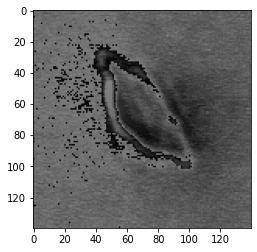

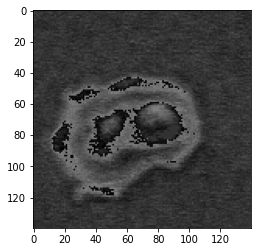

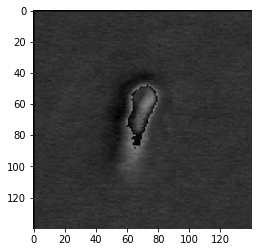

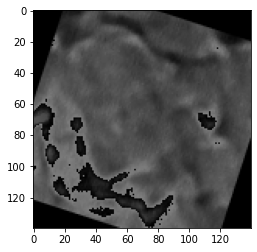

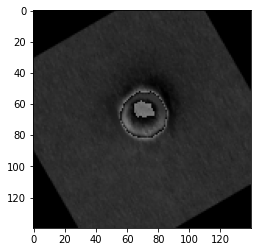

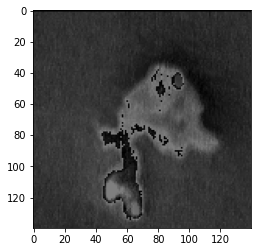

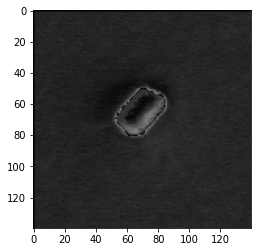

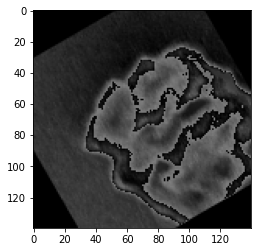

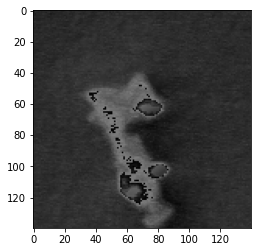

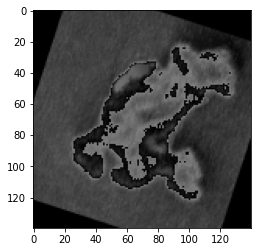

In [368]:
print(len(xTrain))
for i in range(0, 10):
    plt.imshow(xTrain[i])
    plt.show()

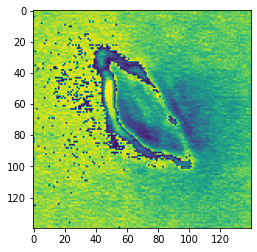

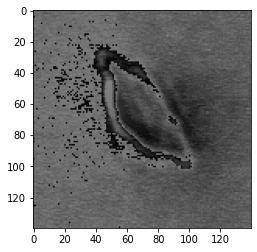

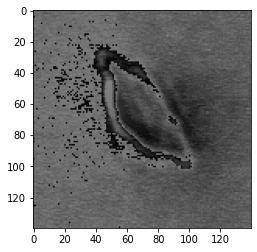

In [336]:
aa = trainImages[0]
plt.imshow(aa)
plt.show()

aaRGB = im.fromarray(aa).convert('RGB')
plt.imshow(aaRGB)
plt.show()

aaPixels = np.array(aaRGB.getdata()).reshape(p.imgSize[0], p.imgSize[1], 3)


plt.imshow(aaPixels)
plt.show()

### Re-scale image and convert it to RGB (3-channels) for object detection purposes (Later)

In [230]:
'''
aa = (xTrain[0,0]+1)*255/2
plt.imshow(aa)
aaRGB = im.fromarray(aa, 'RGB')
defectImage = im.fromarray(aa).convert('RGB').save('Defect_Images/defect.png')
'''

"\naa = (xTrain[0,0]+1)*255/2\nplt.imshow(aa)\naaRGB = im.fromarray(aa, 'RGB')\ndefectImage = im.fromarray(aa).convert('RGB').save('Defect_Images/defect.png')\n"

### Run object detection algorithm (Later)

In [231]:
'''
execution_path = os.getcwd()

detector = ObjectDetection()
# detector.setModelTypeAsRetinaNet()
# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "pretrained-yolov3.h5"))
detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, "defectImage.jpeg"), output_image_path=os.path.join(execution_path , "defectImageID.jpg"))
detections = detector.detectObjectsFromImage(input_type = "array", input_image=aaRGB, output_image_path=os.path.join(execution_path , "Defect_Images/defectImageID.jpg"))


for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    
'''

'\nexecution_path = os.getcwd()\n\ndetector = ObjectDetection()\n# detector.setModelTypeAsRetinaNet()\n# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))\ndetector.setModelTypeAsYOLOv3()\ndetector.setModelPath(os.path.join(execution_path , "pretrained-yolov3.h5"))\ndetector.loadModel()\n# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, "defectImage.jpeg"), output_image_path=os.path.join(execution_path , "defectImageID.jpg"))\ndetections = detector.detectObjectsFromImage(input_type = "array", input_image=aaRGB, output_image_path=os.path.join(execution_path , "Defect_Images/defectImageID.jpg"))\n\n\nfor eachObject in detections:\n    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )\n    \n'

## Build the CNN model

### Input Layer
* 224x224 RGB image (3 channels)

### 1st Convolutional Block
* 2 convolutional layers
    * Filters: 64; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 2nd Convolutional Block
* 2 convolutional layers
    * Filters: 128; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 3rd Convolutional Block
* 3 convolutional layers
    * Filters: 256; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2

### 4th & 5th Convolutional Blocks
* 3 convolutional layers
    * Filters: 512; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 1st Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### 2nd Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### Output Layer
* 1000 nodes
* Softmax activation function

In [250]:
class CNN():
    def buildModel(self):
        # Input structure as a placeholder
        CNNinput = Input(shape =(224,224,3))

        # 1st Convolutional block
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(CNNinput)
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 2nd Convolutional block
        for i in range(0, 2):
            x = Conv2D(filters=128, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 3rd Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=256, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 4th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 5th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # Fully connected layers
        x = Flatten()(x)
        for i in range(0,2):
            x = Dense(units = 4096, activation ='relu')(x) 
            x = Dropout(p.dropoutRate)(x)
        CNNoutput = Dense(units = 1000, activation ='softmax')(x)

        # Create model
        model = Model(inputs = CNNinput, outputs = CNNoutput)
        return model
    
    def trainCNN(model, xTrain, yTrain, xVal, yVal):
        model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

        history = model.fit(xTrain, yTrain, epochs=10, 
                            validation_data=(xVal, yVal))
        return history

In [251]:
# Instantiate object
cnn = CNN()
model = cnn.buildModel()
model.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1333 (Conv2D)         (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1334 (Conv2D)         (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1335 (Conv2D)         (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_1336 (Conv2D)         (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 56, 56, 128)       0  

## Train the CNN

In [276]:
from matplotlib import cm
from numpy import asarray
from PIL import ImageOps

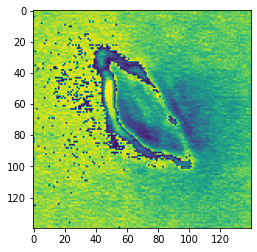

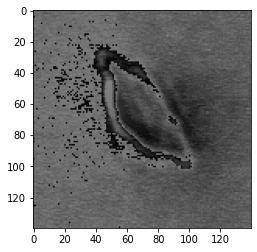

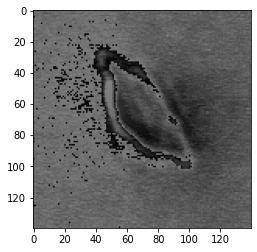

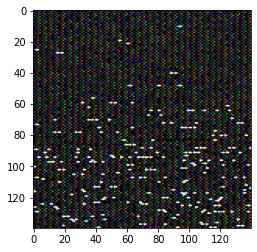

In [271]:
asarray(aaRGB)
plt.imshow(asarray(aaRGB))

In [246]:
aa = np.concatenate(trainImages, axis=0)
print(aa.shape)

(3329200, 140)


In [236]:


# Train the CNN
history = cnn.trainCNN(model, trainImages, trainLabels, valImages, valLabels)

TypeError: trainCNN() takes 5 positional arguments but 6 were given

## Old Code

In [ ]:
# Load
# [...]

# Outlier detection using clustering?
# [...]

# Data augmentation by roating 60 degrees
# [...]
# rotate = tfa.image.rotate(img, tf.constant(np.pi/3))
# visualize(image, rotated)
